In [3]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.pyplot import figure
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import pandas as pd
from sklearn.model_selection import KFold
import cv2 as cv
from skimage import color

In [4]:
img = cv.imread('/content/surfer.jpeg')

def generate_feature_vector(image):
  # Load image, get its dimensions
  image_np = np.array(image)
  # Return an array of the row and column indices of the image (height and width)
  img_indices = np.indices((image_np.shape[0], image_np.shape[1]))
  
  if image_np.ndim == 3:
    # Create the features matrix of row and col indices, plus pixel values
    features = np.array([img_indices[0].flatten(), img_indices[1].flatten(), 
                             image_np[..., 0].flatten(), image_np[..., 1].flatten(), image_np[..., 2].flatten()])
    min_f = np.min(features, axis=1)
    max_f = np.max(features, axis=1)
    ranges = max_f - min_f
        # Each feature normalized to the unit interval [0,1] using max-min normalization: (x - min) / (max - min) 
        # New axis np.newaxis to allow numpy broadcasting
        # np.diag(1/ranges) to perform the division operation in matrix form
    normalized_data = np.diag(1 / ranges).dot(features - min_f[:, np.newaxis])
  else:
    print("Not a colour image")
        
  # Returns feature vector of normalized pixels as shape (height*width, 3 or 5)
  return image_np, normalized_data.T

In [5]:
kf = KFold(10, shuffle=True)
img_np, feature_vector = generate_feature_vector(img)
grid_cv: GridSearchCV = GridSearchCV(GaussianMixture(), {"n_components": np.arange(1, 11)}, cv=kf).fit(feature_vector)

In [6]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.331387,0.043103,0.005096,0.002586,1,{'n_components': 1},3.333265,3.316641,3.273903,3.291200,3.334557,3.382303,3.257186,3.362692,3.347433,3.262393,3.316157,0.041142,10
1,1.668017,0.515778,0.008805,0.007632,2,{'n_components': 2},4.726670,4.720685,4.708092,4.739521,4.739863,4.747655,4.671865,4.768272,4.767997,4.699577,4.729020,0.028778,9
2,1.760654,0.246056,0.008919,0.001966,3,{'n_components': 3},5.330106,5.571568,5.334178,5.556058,5.558268,5.587215,5.526083,5.616175,5.361502,5.527574,5.496873,0.104713,8
3,2.975207,0.784282,0.010212,0.000565,4,{'n_components': 4},5.990261,5.961313,5.960336,5.968752,5.984622,6.020426,5.982477,6.027582,6.015802,6.001118,5.991269,0.023133,7
4,4.121399,1.370717,0.013776,0.005094,5,{'n_components': 5},6.782837,6.787813,6.476916,6.771031,6.811907,6.505559,6.755526,6.817137,6.791217,6.468607,6.696855,0.140813,6
5,5.088360,1.231750,0.015871,0.004753,6,{'n_components': 6},7.166660,6.805270,7.085382,7.147213,6.814912,7.094485,6.997519,7.217902,7.188304,7.088660,7.060631,0.138524,5
6,4.517963,0.928142,0.016278,0.000489,7,{'n_components': 7},7.366019,7.280118,7.366305,7.394897,7.381895,7.441485,7.395281,7.402253,7.347925,7.427485,7.380366,0.042868,4
7,7.391541,1.192812,0.018720,0.002125,8,{'n_components': 8},7.565471,7.486151,7.468055,7.530380,7.560406,7.570022,7.542868,7.604595,7.498497,7.490215,7.531666,0.042216,3
8,11.368821,1.182354,0.023301,0.007199,9,{'n_components': 9},7.652385,7.678323,7.600248,7.670148,7.640907,7.720557,7.684844,7.743534,7.714875,7.683989,7.678981,0.039595,2
9,10.561439,1.229977,0.022464,0.001504,10,{'n_components': 10},7.821493,7.813633,7.798240,7.805911,7.820297,7.700550,7.757895,7.745671,7.743163,7.830679,7.783753,0.041527,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


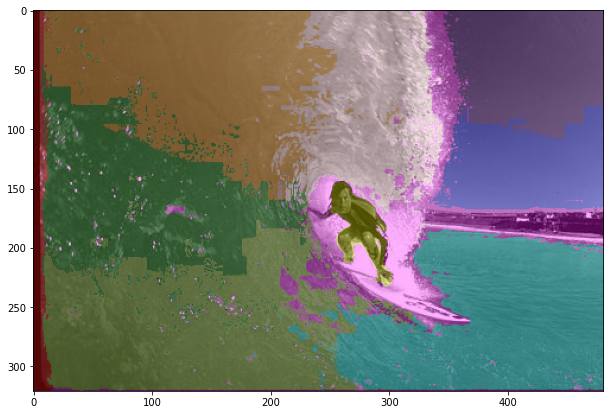

In [15]:
fig, ax = plt.subplots(figsize=(11, 7))
#labels = grid_cv.predict(feature_vector) 
#bitmap=(labels.reshape(img_np.shape[0],img_np.shape[1]))

#condensing the above two lines as:
gmm_img = color.label2rgb(grid_cv.predict(feature_vector).reshape(img_np.shape[:2]), img_np, kind="overlay")
ax.imshow(gmm_img)

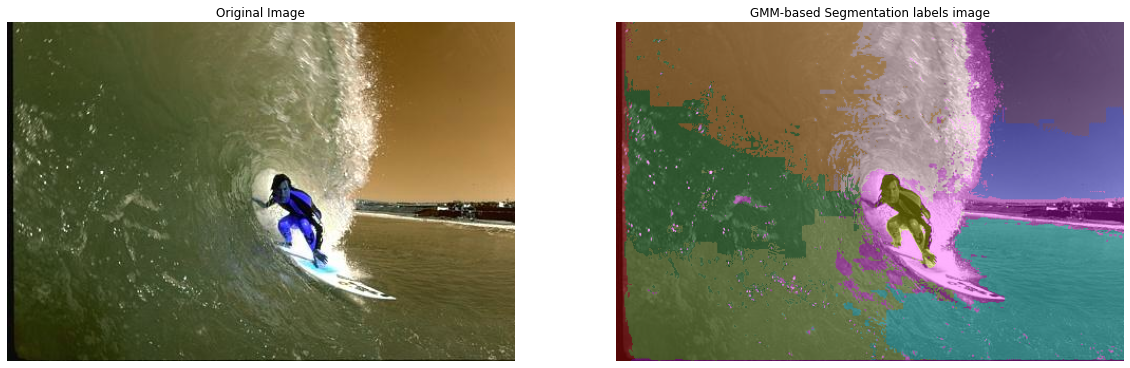

In [21]:
rows =1
cols = 2

fig = plt.figure(figsize=(20, 15))
fig.add_subplot(rows, cols, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, cols, 2)
plt.imshow(gmm_img)
plt.axis('off')
plt.title("GMM-based Segmentation labels image")
plt.show()
